# Forschungsprojekt Endboss der Uni <!-- test -->

## Aufbau

1. [Einführung](#einführung)
    1. [Hintergrund](#hintergrund)
    2. [Fragestellungen und Erwartungen](#fragen)
    3. [Methoden](#methoden)
2. [Laden der Daten](#laden)
3. [Visualisieren der Recordings](#vis_rec)
4. [Visualisieren der Stimuli](#vis_stim)
5. [Erstellung der ROC-Curve](#curve)
5. [Diskussion](#diskussion)

## Einleitung <a name="einleitung"></a>

### Hintergrund <a name="hintergrund"></a> 
Ziel dieses Projektes ist es einen Datensatz aus Spike Train Recordings von Wanderheuschrecken (Locusta migratoria) zu visualisieren und untersuchen. 
Dabei wurden Aktionspotentiale von Nervenzellen der Wanderheuschrecken mittels ihrer Axonen in Hörrezeptoren aufgezeichnet. Die Heuschrecken wurden inmitten zweier Lautsprecher platziert die 60cm Abstand voneinander hatten. Jeder audio-Reiz wurden mit einer Rate von 100kHz von dem jeweiligen Lautsprecher apgespielt, der ipsilateral zu den beobachteten Nerven stand. Die Experimente wurden an Zellen mit verschiedenen Frequenz-präferenzen durchgeführt. Die Präferenz der jeweiligen Zellen wurde mittels der f-I-Kurve der spezifischen Zelle ermittelt. f-I-Kurve steht für "Frequenz-Stromfluss-Kurve", sie zeigt den synaptischen Stromfluss eines Neurons in Bezug auf dessen Feuerrate. Sämtliche anschließenden Experimente wurden mittels eines reinen Tons in der bevorzugten Frequenz der Zelle durchgeführt. 
<!-- Bild f-I-Kurve suchen -->

### Fragestellungen und Erwartungen <a name="fragen"></a> 

Dieses Projekt bezieht sich auf Receiver-Operating-Characteristic-Curves, kurz ROC-Curves. Um ROC-Curves zu verstehen muss zuerst erklärt werden, wie unterschiedliche Ergebnisse in der Statistik differenziert werden können. 

Sei zum Beispiel r eine gemessene Feuerrate während eines Versuches an einer Nervenzelle. Diese Feuerrate wird mit einem Schwellenwert z verglichen. Ist r größergleich z, gibt unser Test das Ergebnis "Plus". "Plus" als Testergebnis heißt, dass der Test behauptet, dass der Stimulus sich in die präferierte Richtung des Neurons bewegt.

Reagiert eine Nervenzelle im visuellen Bereich zum Beispiel bevorzugt auf beobachtete Bewegungen "nach rechts" in der realen Welt, dann möchten wir von dem Test ein "Plus"-Ergebnis erhalten, wenn ein Objekt vor dem Probanden nach rechts bewegt wird und ein "Minus"-Ergebnis, wenn sich das Objekt nach links bewegt. 
<!-- Eventuell cut this^  Als "allgemeinere/verständlichere" Erklärung noch aufgeschrieben -->

 Die Wahrscheinlichkeit ein korrektes "Plus"-Ergebnis zu erhalten wird geschrieben als β(z)=P[r≥z|+], und wird im Allgemeinen als "Hit", "Hit rate", oder "Power" des Tests bezeichnet. Außerdem ist die Definition α(z)=P[r≥z|-] wichtig. α wird auch "Size", oder "False alarm rate" des Tests genannt. In Worten beschrieben gibt α die Wahrscheinlichkeit an, dass der Test fälschlicherweise einen "Plus"-Stimulus wiedergibt, obwohl in Wirklichkeit ein "Minus"-Stimulus, also ein Stimulus der sich entgegengesetzt der präferierten Richtung des Neurons bewegt, vorliegt. Folglich schließt sich, dass die Wahrscheinlichkeit einen "Plus"-Stimulus inkorrekt vom Test identifiziert zu bekommen 1-β ist, und die Wahrscheinlichkeit einen "Minus"-Stimulus korrekt zu identifizieren mittels 1-α gegeben ist.
In all diesen Fällen soll z ein Wert sein, für den die Hit-Rate des Tests maximal groß, und gleichzeitig die False-Alarm-Rate so niedrig wie möglich gehalten werden soll.


Da der Schwellenwert z frei wählbar ist, werden ROC-Curves als Veranschaulichung genutzt. 
Jeder Punkt auf einer ROC-Curve korrespondiert zu einem spezifischen Wert für z. Damit erhalten wir eine visualisierte "Size-to-Power-ratio". 
Die x-Koordinate des Punktes ist die "Size" des Tests α für diesen Wert z. Die y-Koordinate des Punktes korrespondiert zu der "Power" des Tests β für diesen Wert z.
<p align="center">
<img width="400" src="Resources/ROC.png">
</p>

Da der Schwellenwert z kontinuierlich variiert wird, erhalten wir mittels all den einzelnen Punkten eine komplette ROC-Curve.

Beispiele für extreme z-Werte: 

Sei z=0, so wird die Feuerrate r immer größergleich z sein. Damit ist α=β=1, wir finden diesen Punkt an der oberen rechten Grenze der ROC-Curve.
Im anderen Extremfall, für sehr große z wird r immer kleiner sein als z. Hier erhalten wir immer "Minus" als Testergebnis. Dieser Punkt ist an der unteren linken Grenze der ROC-Curve sichtbar.
In beiden Fällen kann man richtige Testergebnisse nicht von Falschen unterscheiden.

Zwischen diesen beiden Extremwerten für z bildet sich die ROC-Curve als eine Funktion von z.
Die besten Schwellwerte sind so weit oben links wie möglich, da hier die "Power" β des Tests sehr hoch ist, gepaart mit e.α
<!-- Bild?  verbunden ist.
<!-- Bild? Entweder hier oder schon bei dem oberen Notiz. Falls hier e<-- vtl die Extremfälle z= 0 und z=groß hervorheben?-->

 Es ist auch möglich solche Werte mittels der sogennanten "Two-alternative forced choice", hier als 2-AFC abgekürzt, zu erhalten. Bei 2-AFC wird ein Stimulus zweimal vorgegeben, einmal in "Plus" und das andere mal in "Minus" Richtung. 

Dabei wird den jeweiligen Versuchen eine Feuerrate, r1 und r2 gegeben. 
So können diese beide Feuerraten als "Schwelle" für einander agieren. 
Ist zum Beispiel r1≥r2 gibt der Test den erst gegeben Stimulus als die "Plus"-Richtung an. 
r2 zählt in diesem Fall als Schwellenwert z für r1. 

Als Formel: $$P[r1≥z│+]=β(z) (mit r2=z)\text{ }.$$

Um die tatsächliche Wahrscheinlichkeit einer richtigen Antwort des Tests zu berechnen, schreibt man: $$P[korrekt]=\int_0^∞ dz\text{ }p[z│-]  β(z)\text{ }.$$
<!-- Wie macht man das Integralzeichen richtig mit unterer Grenze 0 und oberer Grnze infinity? -->
Hier entrsricht p[z|-] der bedingten  Feurraten Wahrscheinlichkeitsdichte für r=z. 
Man geht in solchen Fällen davon aus, dass r2 in dem Bereich eines z+Δz liegt, wobei bedeutet, dass wir] heißt in Wörtern, dass wir einen "Minus"-Stimulus vorliegen haben, und der Test z, also r2 als Ergebnis ausgibt. 

Die False-Alarm-Rate dieses Tests ist gegeben mittels $$α(z)= ∫_z^∞ dr\text{ }p[r|-]\text{ },$$ die Power des Tests ist dann $$β(z)= ∫_z^∞ dr\text{ }p[r|+]\text{ }.$$

Sollte r2 zu Anfang > r1 sein, tauschen sie ihre Rollen in diesen Formeln da 2-AFC symmetrisch ist. r1 wäre dann zum Beispiel z. 

<!-- Könnte hier noch mehr auf Details eingehen wie zb mathematische Herleitungen. Könnte außerdem beschreiben wie Dayan&Abott das eine Neuron als "Neuron" (für Plus Stimulus) und als "hypothetical Anti-Neuron" (für Minus Stimulus) beschreiben-->



<!-- TBW: ROC-Curve functionen
ROC-Curve mathematisches wissen keyword: threshold 
vergleich kleiner threshold zu großem threshold an verhalten der ROC-Curve (zu hoch führt zu sehr vielen correct trues (ß), zu niedrig wird zu reinem raten 50ß/50a weil threshold immer "true" sagt)
Grundwissen zu ROC-Curves: Alpha/Beta test, falsch positiv (Vergleiche mit threshold für fehler entstehung)

ROC-Curve keyword: Two-alternative forced choice 
Positiv stimulus (Plus richtung) & negative stimulus (minus richtung) werden beide angegeben. Ziel: Plus richtung erkennen. Trial 1 ist eine richtung, trial 2 zweite richtung, wenn zb. rate1 > rate2 ist die gegebene Antwort trial 1, sonst (rate2>rate1) trial 2 
Hintergrundwissen TAFC: Bayes ([z|+])

Mögliche Bilder für visualisieren: Standard ROC-Curve, ROC-Curve mit verschiedenen thresholds in gleichem bild, ROC-Curves in einer gesamten population an nervenzellen (wenns dazu bild gibt)  -->



### Methoden <a name="methoden"></a> <!-- später, evntl. Unterteilung in Spike-Raster-Plots, Power-Spectral Density und ROC-Curve -->

## Laden der Daten <a name="laden"></a> <!-- wichtig: der Pfad für die Daten ist bei uns anders als später im Notebook --> 

### Aufbau der Daten <!-- siehe README --> <!-- wofür steht "co"? Was ist die modality? Was ist "lmd_co200.dat"? -->


### Speichern der .dat Dateien in json

In [16]:
import json
import numpy as np

path = "./Resources/data/"

def read_dat_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def parse_dat_to_json(dat_lines):
    json_data = []
    current_trial = []
    for line in dat_lines:
        if line.startswith("#"):
            continue  # Ignore lines starting with "#"
        elif line.strip() == "":
            if current_trial:
                json_data.append(current_trial)
                current_trial = []
            else:
                json_data.append([])  # Add an empty sublist
        else:
            timestamp = float(line.strip())
            current_trial.append(timestamp)

    if current_trial:
        json_data.append(current_trial)
    result=[]
    for sublist in json_data:
        if sublist == []:
            consecutive_empty_sublists += 1
            if consecutive_empty_sublists <= 1:
                result.append(sublist)
        else:
            result.append(sublist)
            consecutive_empty_sublists = 0

    return result



def write_json_file(json_data, output_path):
    with open(output_path, 'w') as json_file:
        json.dump(json_data, json_file, indent=2)

In [14]:
def parse_stim_to_json(stim_lines):
    t = []
    s = []
    for line in stim_lines:
        line = line.split()
        s.append(float(line[1]))
        t.append(int(line[0]))
    stim = {'t': t, 'stim': s}
    return stim
        

def parse_dat_to_json_2(dat_lines):
    json_data = {}
    trial_number = 0
    current_trial = []
    
    for line in dat_lines:
        
        # Search for lines where a new trial starts.
        # If such a line was found, 
        # first append the list containing the spike times from the previous trial to the dict containing all trials
        # and then increase the trial number reset the list containing the spike times of the current trial
        if line.startswith("# repetition number"): # repetitio
            if trial_number > 0: 
                json_data.update({trial_number: current_trial})
            trial_number += 1
            current_trial = []
            
        if line[0].isdigit():
            current_trial.append(int(line))
    # so far this is a dict and not yet a json-object!
    # but json can save dicts to .json files
    return json_data 

## Visualisieren der Recordings <a name="vis_rec"></a>
Um die Recordings beispielhaft zu visualisieren erstellen wir Spike-Raster-Plots von zwei seperaten Aufnahmen, jeweils mit Signal 1 bzw. Signal 2. Wir verwenden die zuvor definierte Funktion und speichern die Daten in den jeweiligen Variablen:

In [72]:
stim_file_path = path+'stimuli/gaussModality_co200.dat'
stim_lines = read_dat_file(stim_file_path)
json_stim = parse_stim_to_json(stim_lines)

t = np.array(json_stim['t'])
s = np.array(json_stim['stim'])
mask = t<1.e6 # first second

NameError: name 'parse_stim_to_json2' is not defined

In [19]:
dat_file_path = path+'03-01-15-ab/03-01-15-ab_sig1_spikes.dat'
json_output_path = 'output.json'
dat_lines = read_dat_file(dat_file_path)
#json_data = parse_dat_to_json(dat_lines)
json_data = parse_dat_to_json_2(dat_lines)
write_json_file(json_data, json_output_path)

with open('./output.json', 'r') as file:
    spikes1 = json.load(file)
#spikes1.insert(0, [])

Nun erstellen wir die Plots:

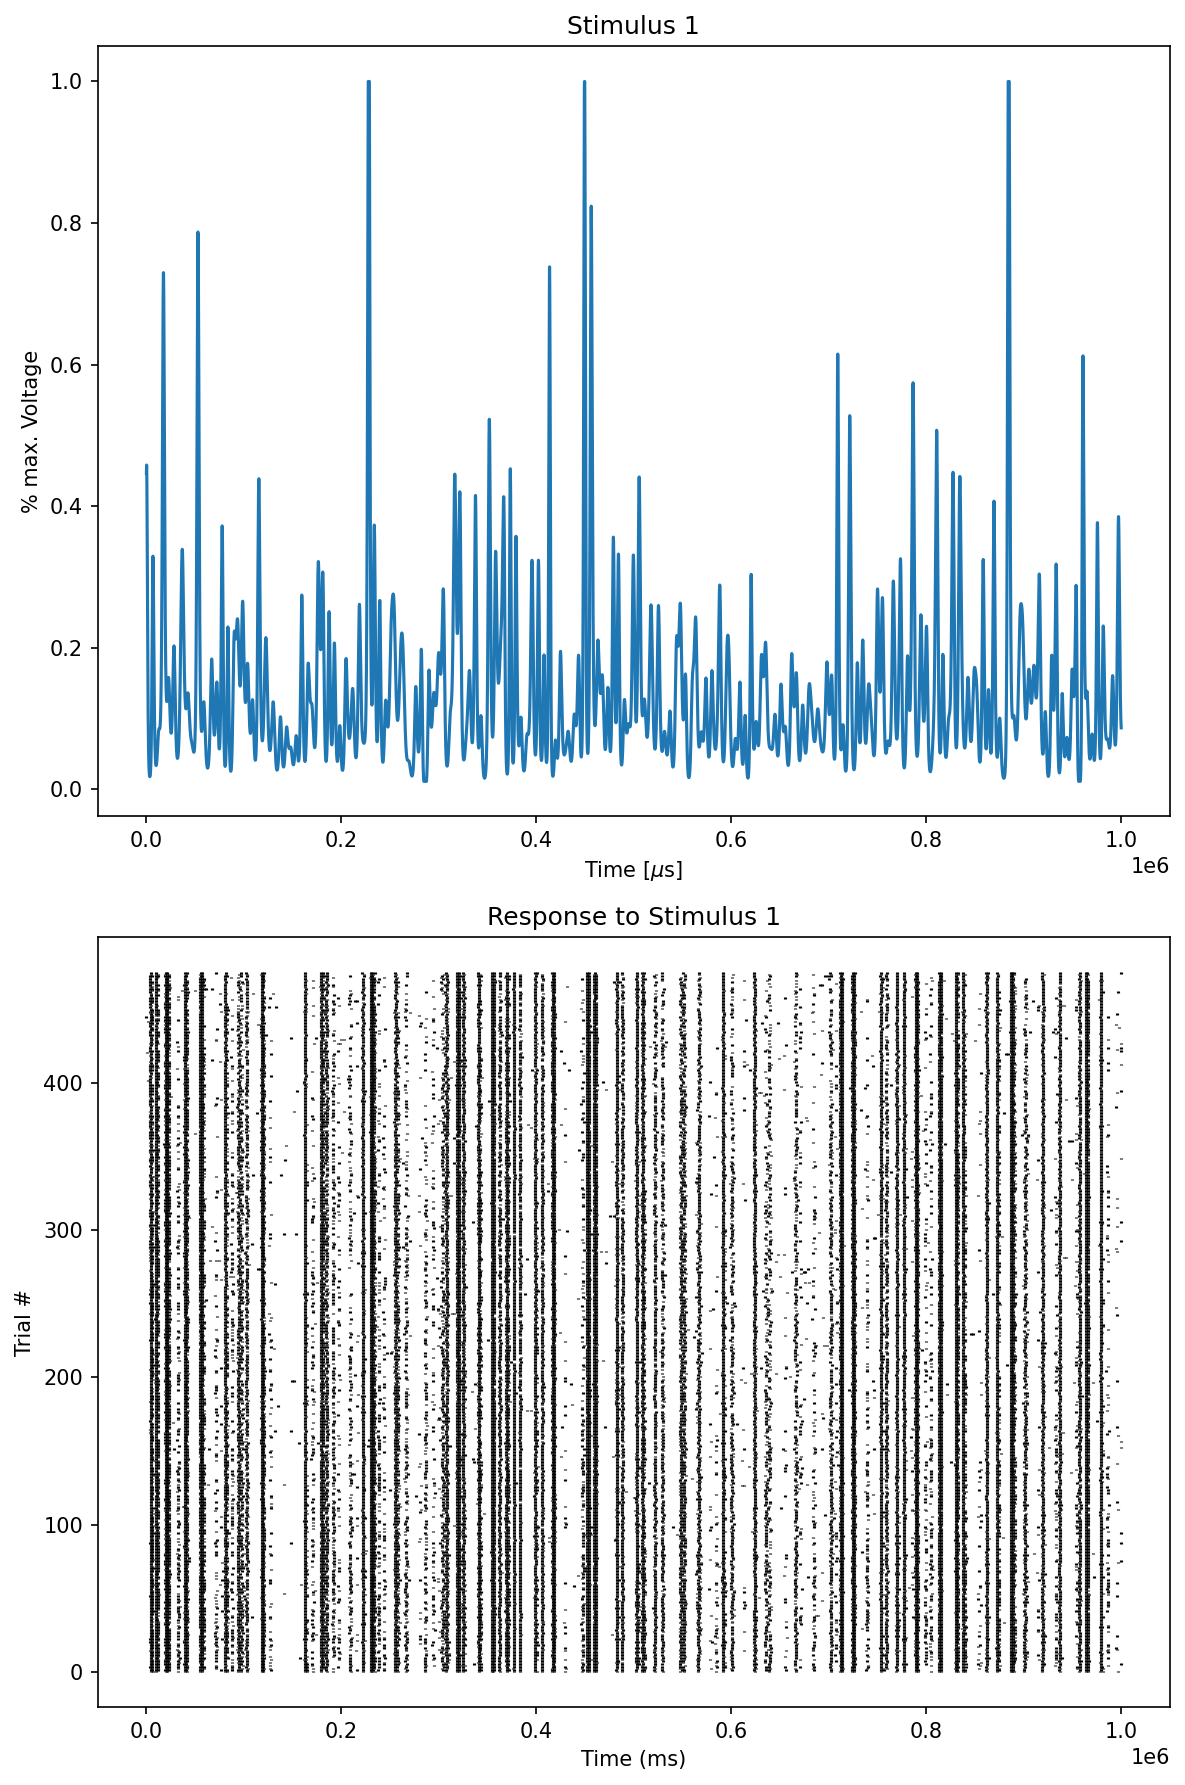

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(8, 12), dpi=150)
for i, st in enumerate(spikes1.values()):
    st = np.array(st)
    st = st[st<1.e6]
    ax[1].vlines(st, i, i+1, color='k')
    
ax[0].plot(t[mask],s[mask])
ax[0].set_xlabel('Time [$\mu$s]')
ax[0].set_ylabel('% max. Voltage')

ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Trial #')
#ax[2].set_xlabel('Time (ms)')

ax[0].set_title('Stimulus 1')
ax[1].set_title('Response to Stimulus 1')
#ax[2].set_title('Response to Stimulus 1')

for i in range(2):
    ax[i].set_xlim(-.5e5, 1.05e6)

plt.tight_layout()

## Visualisieren der Stimuli <a name="vis_stim"></a>
Als Stimuli wurden neun Gaussverteilungen mit variierenden 
<br> Die Funktion "stimtodB.m" wird verwendet um die Daten der Stimuli in Dezibel umzuwandeln. <!-- Beschreibung Stimuli -->
Um die Stimuli zu visualisieren erstellen wir deren Plots und Power-Spectral Density.

## Visualisieren der Stimuli <a name="vis_stim"></a>
Als Stimuli wurden neun Gaussverteilungen mit variierenden Standardabweichungen (st) und Cutoff-Frequenzen (co) verwendet.
<br> Die Funktion "stimtodB.m" wird in Python umgeschrieben und verwendet um die Daten der Stimuli in Dezibel umzuwandeln. <!-- Beschreibung Stimuli -->
Um die Stimuli zu visualisieren erstellen wir deren Plots und Power-Spectral Density.

In [48]:
def stimtodB(stimulus, maxdB): # maxdb?
    stim = 20 * (1 / np.log(10)) * np.log(stimulus[:, 1] / 2.0e-5)
    m2 = np.max(stim)
    A = maxdB - m2 + stim
    return A

In [71]:
# Example input data
stimulus_data = np.array([[50, 0.351108], [100, 0.349985]])  # Example data 

# Example usage of the function
result = stimtodB(stimulus_data, 0) 

print(result) # format?

[[ -6.02059991 -49.0911855 ]
 [  0.         -49.11901137]]


In [ ]:
""" erstelle 11 arrays über alle Stimuli, jedes mit eigenem maxdb je nach höchtem Wert, dann visualisiere sie"""

# ROC-Curve

In [74]:
""" plotte Curve für bspw 10% coherence, teste dann ob das tatsächlich genügt für Vorhersage (10% threshhold aus paper) """

' plotte Curve für 10% coherence, teste dann ob das tatsächlich genügt für Vorhersage '

In [82]:
import re

def findrate(name):
    try:
        with open('./Resources/data/firing_rates', 'r') as file:
            lines = file.readlines()

            for i, line in enumerate(lines):
                if name in line:
                    # Check if there are two lines below the current line
                    if i + 2 < len(lines):
                        result = re.search(r'firing rate = (\S+)', lines[i + 2].strip()).group(1)  # Remove leading/trailing whitespaces while stripping the output to just return the rate
                        return result
                    else:
                        print("Target string found, but there are not enough lines below.")
                        return None

            print(f"Target string '{name}' not found.")
            return None

    except FileNotFoundError:
        print(f"File '{name}' not found.")
        return None

In [84]:
# Example usage:
print(findrate("03-01-15-ab_sig1_spikes"))

39.32


In [104]:
import numpy as np

def find_local_maxima(dat_file_path):
    try:
        data = np.loadtxt(dat_file_path)

        # Extract timepoints and voltage intensities
        timepoints = data[:, 0]
        voltage_intensities = data[:, 1]

        # Initialize boolean array for local maxima
        is_local_maxima = np.full_like(voltage_intensities, False, dtype=bool)

        # Find local maxima indices
        for i in range(1, len(voltage_intensities) - 1):
            if voltage_intensities[i] > voltage_intensities[i - 1] and voltage_intensities[i] > voltage_intensities[i + 1]:
                is_local_maxima[i] = True

        maxima_timepoints = timepoints[is_local_maxima]

        # format timepoints
        formatted_timepoints = ["{:.2f}".format(tp) for tp in maxima_timepoints]

        return is_local_maxima, formatted_timepoints

    except FileNotFoundError:
        print(f"File '{dat_file_path}' not found.")
        return None


Boolean array for local maxima: [False False False ... False False False]
Timepoints corresponding to local maxima: ['200.00', '6750.00', '13050.00', '17500.00', '22650.00', '28250.00', '36750.00', '42500.00', '52950.00', '58800.00', '66950.00', '72200.00', '77750.00', '83550.00', '90350.00', '93350.00', '98750.00', '103750.00', '108850.00', '115300.00', '122550.00', '130000.00', '137500.00', '143900.00', '147800.00', '153650.00', '159400.00', '166000.00', '169100.00', '176400.00', '180900.00', '187400.00', '192850.00', '198350.00', '204800.00', '211550.00', '218500.00', '233750.00', '239350.00', '245550.00', '253150.00', '262000.00', '268700.00', '276350.00', '282000.00', '289900.00', '295000.00', '299900.00', '304500.00', '316350.00', '321500.00', '331300.00', '337550.00', '343100.00', '351800.00', '358250.00', '366500.00', '373250.00', '379100.00', '384150.00', '390800.00', '395550.00', '402150.00', '407900.00', '413550.00', '419600.00', '424800.00', '432550.00', '438950.00', '44325

In [ ]:
# Example usage:
dat_file_path = './Resources/data/stimuli/gaussModality_co200.dat' 

local_maxima_result, maxima_timepoints_result = find_local_maxima(dat_file_path)

print("Boolean array for local maxima:", local_maxima_result)
print("Timepoints corresponding to local maxima:", maxima_timepoints_result)

In [ ]:
# berechne neun "spikes" als boolean arrays für Maxima aus Stimuli mit find_local_maxima()

In [108]:
def firing_prob(spikes, coherence, minHz, maxHz, dat): #dat ist bspw. ./03-01-16-ab/03-01-16-ab_sig1_spikes.dat

    r=np.arange(minHz,maxHz,)

    with open(path+dat, 'r') as file:
        for line in file:
            if spikes == True: 
                mean_rate = findrate(dat) 
            elif spikes == False:
                mean_rate = 0
    
    std = 10. + 2/coherence
    
    p = 1./(np.sqrt(2.*np.pi)*std)*np.exp(-(r - mean_rate)**2/(2.*std**2))
    p = p/np.sum(p)
    return r, p

In [ ]:
# berechne und plotte firing_prob für alle Stimuli

In [ ]:
# berechne alpha und beta

In [ ]:
# plotte ROC-Curve

In [ ]:
# teste auf minimale coherence zwischen stimulus und antwort